In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5005,ham,ILL B DOWN SOON,NaN,NaN,NaN
1557,ham,Wat r u doing?,NaN,NaN,NaN
5091,ham,No no. I will check all rooms befor activities,NaN,NaN,NaN
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
414,spam,100 dating service cal;l 09064012103 box334sk38ch,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
# Removing unnecessary columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
df.rename(columns={'v1':'Target','v2':'SMS Text'},inplace=True)

In [6]:
df.sample(3)

,Target,SMS Text
1749,ham,DO NOT B LATE LOVE MUM
1344,ham,Were somewhere on Fredericksburg
3952,spam,Refused a loan? Secured or Unsecured? Can't ge...


In [7]:
# checking for null values
df.isna().sum()

Target      0
SMS Text    0
dtype: int64

In [8]:
# Checking for null values
df.isna().sum()

Target      0
SMS Text    0
dtype: int64

In [9]:
# Checking for duplicates values
df.duplicated().sum()

403

In [10]:
# Remove duplicated values
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
# Encoding the target coulumns with 0 and 1 
# Target column is encoded by using lable encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head(3)   

,Target,SMS Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


 ## 2.Exploratory Data Analysis

In [14]:
df.head(6)

,Target,SMS Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [15]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [16]:
# its look like that the ham msf are more as compare to spam msg and data is imbalanced
# for balancing data we can use here over sampelliing or under sampeling
# Represent this using graph
import matplotlib.pyplot as plt
%matplotlib  inline

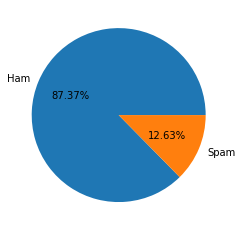

In [17]:
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f%%')
plt.show()

In [18]:
# Install nltk libraries
# Now find out the number of characters,words and sentences present in SMS Text

df['No_of_Char'] = df['SMS Text'].apply(len)

In [19]:
df.head(3)

,Target,SMS Text,No_of_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [20]:
import nltk
!pip3 install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sachin
[nltk_data]     Wandre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk import word_tokenize,sent_tokenize

In [22]:
# df['No_of_Words'] = df['SMS Text'].apply(lambda word:nltk.word_tokenize(word))

In [23]:
df['No_of_Words'] = df['SMS Text'].apply(lambda word:len(nltk.word_tokenize(word)))

In [24]:
df.head(3)

,Target,SMS Text,No_of_Char,No_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [25]:
df['No_of_Sentences'] = df['SMS Text'].apply(lambda word:len(nltk.sent_tokenize(word)))

In [26]:
df.head(3)

,Target,SMS Text,No_of_Char,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [27]:
df.corr()

,Target,No_of_Char,No_of_Words,No_of_Sentences
Target,1.000000,0.384717,0.262969,0.267602
No_of_Char,0.384717,1.000000,0.965784,0.626118
No_of_Words,0.262969,0.965784,1.000000,0.680882
No_of_Sentences,0.267602,0.626118,0.680882,1.000000


In [28]:
import seaborn as sns

<AxesSubplot:>

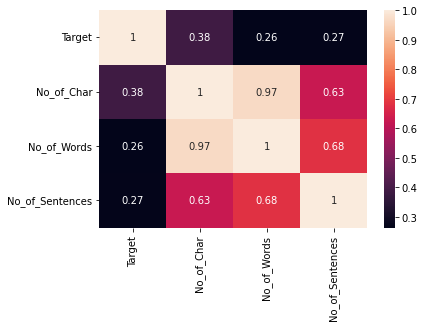

In [29]:
# Heatmap to find the correlations
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='No_of_Char', ylabel='Count'>

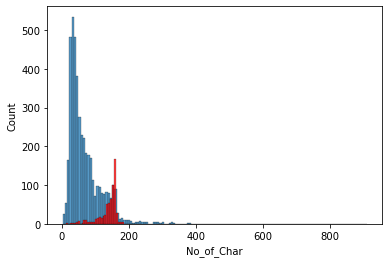

In [30]:
sns.histplot(df[df['Target'] == 0]['No_of_Char'])
sns.histplot(df[df['Target'] == 1]['No_of_Char'],color='red')

<AxesSubplot:xlabel='No_of_Words', ylabel='Count'>

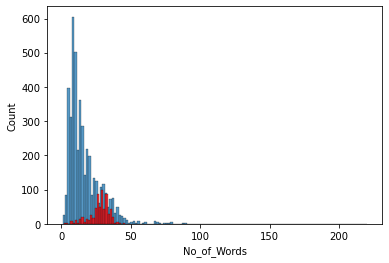

In [31]:
sns.histplot(df[df['Target'] == 0]['No_of_Words'])
sns.histplot(df[df['Target'] == 1]['No_of_Words'],color='red')

<AxesSubplot:xlabel='No_of_Sentences', ylabel='Count'>

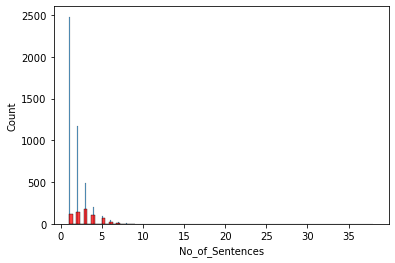

In [32]:
sns.histplot(df[df['Target'] == 0]['No_of_Sentences'])
sns.histplot(df[df['Target'] == 1]['No_of_Sentences'],color='red')

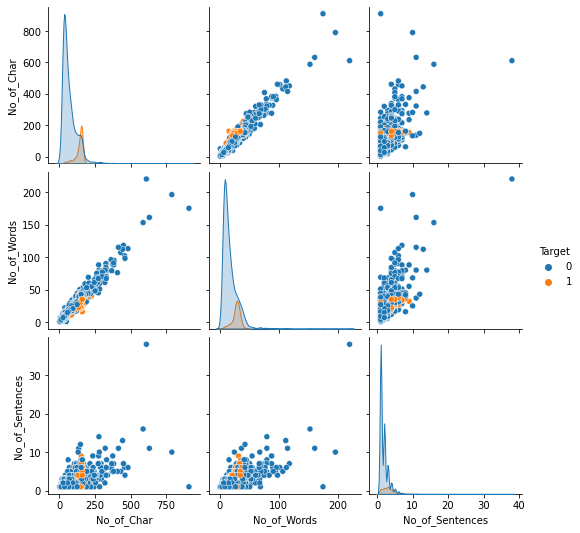

In [33]:
sns.pairplot(df,hue='Target')

## 3.Data Preprocessing

- Lower case
- Tokenization
- Remove special characters
- Removing stop words and punctuation
- Stemming

In [34]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Sachin
[nltk_data]     Wandre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
ps = PorterStemmer()

In [36]:
# def lower_case(text):
#     return text.lower()

# def tokenization(text):
#     return nltk.word_tokenize(text)

# def remove_special_char(text):
#     new_text = ""
#     for t in text:
#         if t.isalnum():
#             new_text = new_text + t
#     return new_text

# def remove_stop_words(text):
#     without_stop_words = " "
#     for t in text:
#         if t not in stopwords.words('english') and t not in string.punctuation:
#             without_stop_words = without_stop_words + t
#     return without_stop_words

# def stemming(text):
#     new_text = []
#     for t in text:
#         new_text.append(ps.stem(t))
#     return "".join(new_text)

# df['Transformed_Text'] = df['SMS Text'].apply(lower_case)
# df['Transformed_Text'] = df['Transformed_Text'].apply(tokenization)
# df['Transformed_Text'] = df['Transformed_Text'].apply(remove_special_char)
# df['Transformed_Text'] = df['Transformed_Text'].apply(remove_stop_words)
# df['Transformed_Text'] = df['Transformed_Text'].apply(stemming)

In [37]:
def data_preprocessing(text):
    
    # Convert text into lower case
    text = text.lower()
    
    # Word tokenization
    text = nltk.word_tokenize(text)
    
    # Remove special characters
    temp_string = []
    for i in text:
        if i.isalnum():
            temp_string.append(i)
    
    text = temp_string[:]
    temp_string.clear()
    
    # Remove stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp_string.append(i)
            
    text = temp_string[:]
    temp_string.clear()
    
    # Stemming
    for i in text:
        temp_string.append(ps.stem(i))
       
    return " ".join(temp_string)

In [38]:
df['Transformed_Text'] = df['SMS Text'].apply(data_preprocessing)

In [39]:
df.head(4)

,Target,SMS Text,No_of_Char,No_of_Words,No_of_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [40]:
df['Transformed_Text'][9]

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [41]:
## Generate the word cloud to check the mostly used word in ham and spam
#!pip install wordCloud

In [42]:
# wordcloud for spam msg 
# from wordcloud import WordCloud
# text_data = df[df['Target'] == 1 ]['Transformed_Text'].str.cat(sep=' ')
# #df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
# wordcloud  = WordCloud(height=200,width=200,background_color='white',min_font_size=10,font_step=1)
# spam_wordcloud = wordcloud.generate(text_data)
# plt.figure(figsize=(15,15))
# plt.imshow(spam_wordcloud)
# plt.show()

In [43]:
# wordcloud for ham msg 

# wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
# ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_Text'].str.cat(sep=" "))
# plt.figure(figsize=(15,6))
# plt.imshow(ham_wc)

In [44]:
spam_list = df[df['Target'] == 1 ]['Transformed_Text'].tolist()

In [45]:
# top
spam_corpus = []
for msg in spam_list:
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus)


['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [51]:
len(spam_corpus)

9939

In [52]:
ham_list = df[df['Target'] == 0 ]['Transformed_Text'].tolist()

In [53]:
# top
ham_corpus = []
for msg in ham_list:
    for word in msg.split():
        ham_corpus.append(word)
print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [54]:
from collections import Counter
x = Counter(spam_corpus)
print(x)

Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt': 22, 'entri': 21, 'word'

In [55]:
from collections import Counter
y = Counter(ham_corpus)
print(y)

Counter({'u': 883, 'go': 404, 'get': 349, 'gt': 288, 'lt': 287, '2': 284, 'come': 275, 'got': 236, 'know': 236, 'like': 234, 'call': 233, 'time': 219, 'love': 216, 'ok': 215, 'good': 213, 'want': 208, 'ur': 197, 'day': 190, 'need': 170, 'one': 165, 'lor': 159, '4': 156, 'home': 152, 'think': 149, 'see': 147, 'take': 143, 'still': 143, 'da': 142, 'tell': 133, 'make': 129, 'say': 127, 'back': 127, 'today': 123, 'hope': 122, 'ask': 121, 'sorri': 121, 'n': 120, 'send': 120, 'r': 120, 'work': 118, 'dont': 118, 'meet': 112, 'hi': 111, 'well': 109, 'thing': 109, 'wat': 108, 'k': 107, 'much': 107, 'night': 107, 'oh': 106, 'miss': 106, 'happi': 104, 'give': 102, 'later': 100, 'hey': 100, 'great': 97, 'na': 96, 'wait': 96, 'way': 95, 'alreadi': 90, 'thank': 87, 'let': 86, 'yeah': 86, 'text': 85, 'feel': 83, 'realli': 83, 'pl': 83, 'wan': 81, 'dear': 81, 'right': 80, 'e': 77, 'even': 77, 'friend': 77, 'sure': 76, 'said': 76, 'co': 76, 'would': 75, 'leav': 75, 'lol': 74, 'babe': 74, 'pleas': 74, '

In [48]:
from collections import Counter
x = Counter(spam_corpus)
print(x)

Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt': 22, 'entri': 21, 'word'

In [49]:
spam_most_common = x.most_common(30)
print(spam_most_common)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


In [56]:
df1 =  pd.DataFrame(spam_most_common[0],spam_most_common[1])
df1

,0
free,call
191,320


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


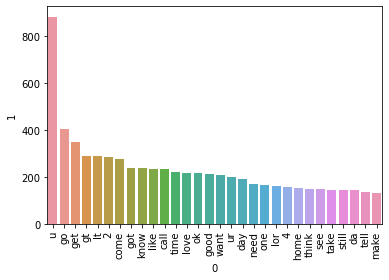

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [61]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
X = cv.fit_transform(df['Transformed_Text']).toarray()
X.shape

(5169, 6708)

In [67]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [78]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()
X.shape

(5169, 3000)

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542
